# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import os
print(os.getcwd())


/Users/samuelwalford


In [10]:
# Carregar o DataFrame
df = pd.read_csv('previsao_de_renda (1).csv')

# Exibir as primeiras linhas para verificar se carregou corretamente
print(df.head())


   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

In [11]:
print("Média de Renda por Posse de Imóvel:")
print(df.groupby('posse_de_imovel')['renda'].mean())
print("\nMédia de Renda por Posse de Veículo:")
print(df.groupby('posse_de_veiculo')['renda'].mean())


Média de Renda por Posse de Imóvel:
posse_de_imovel
False    4426.970482
True     4721.052704
Name: renda, dtype: float64

Média de Renda por Posse de Veículo:
posse_de_veiculo
False    4390.506963
True     4992.579609
Name: renda, dtype: float64


In [12]:
import scipy.stats as stats

# Teste t para posse de imóvel
tstat_imovel, pvalue_imovel = stats.ttest_ind(df[df['posse_de_imovel'] == 'sim']['renda'], 
                                              df[df['posse_de_imovel'] == 'nao']['renda'])
print(f"Teste t para posse de imóvel: p-valor = {pvalue_imovel}")

# Teste t para posse de veículo
tstat_veiculo, pvalue_veiculo = stats.ttest_ind(df[df['posse_de_veiculo'] == 'sim']['renda'], 
                                                df[df['posse_de_veiculo'] == 'nao']['renda'])
print(f"Teste t para posse de veículo: p-valor = {pvalue_veiculo}")


Teste t para posse de imóvel: p-valor = nan
Teste t para posse de veículo: p-valor = nan


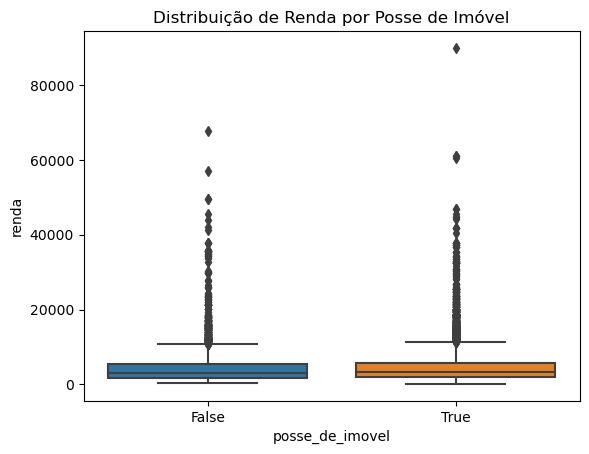

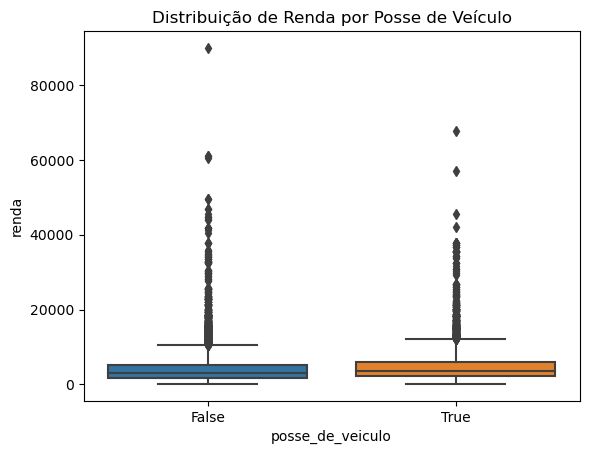

In [13]:
# Boxplot para posse de imóvel
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Distribuição de Renda por Posse de Imóvel')
plt.show()

# Boxplot para posse de veículo
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title('Distribuição de Renda por Posse de Veículo')
plt.show()
